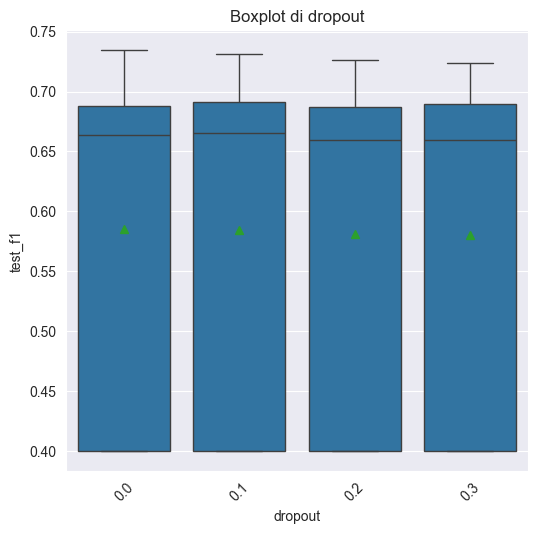

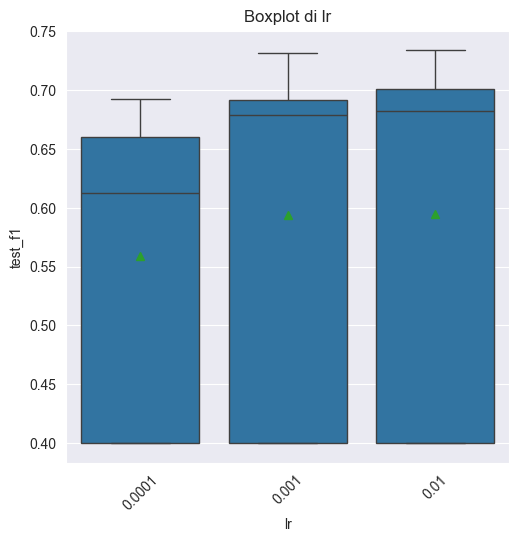

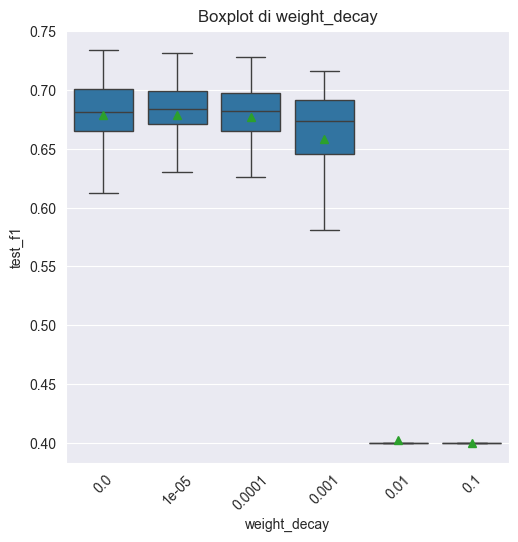

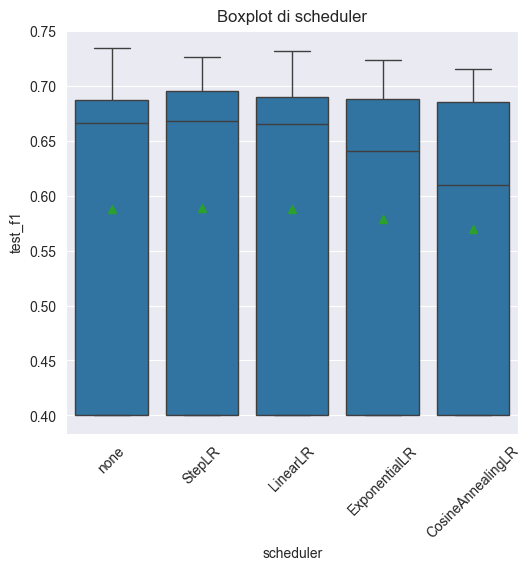

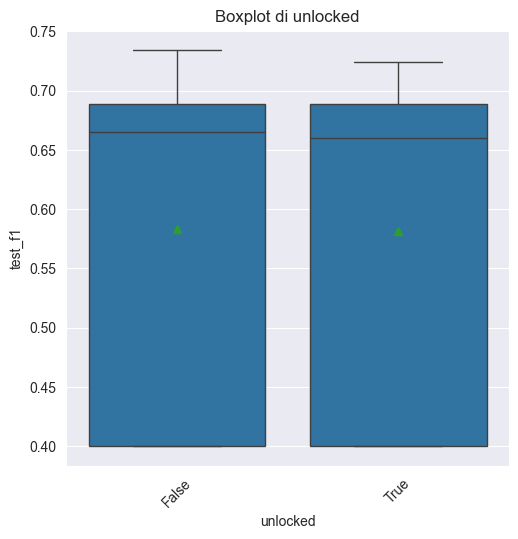

In [1]:
#Per avere i risultati singolarmente usa questo script

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il CSV
df = pd.read_csv('clip-vit-large-patch14_GS.csv')  # Modifica il nome del file se necessario

# Liste delle colonne di interesse
columns_to_plot = ["dropout", "lr", "weight_decay", "scheduler", "unlocked"]

# Imposta il layout per i grafici


# Per ogni colonna, filtra i valori unici e crea il boxplot
for i, column in enumerate(columns_to_plot, 1):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, i)  # 2 righe e 3 colonne per i grafici
    sns.boxplot(x=column, y="test_f1", data=df, showmeans=True, showfliers=False)
    plt.title(f"Boxplot di {column}")
    plt.xlabel(column)
    plt.ylabel('test_f1')

    # Inclinazione delle etichette dell'asse x
    plt.xticks(rotation=45)
    # Mostra i grafici
    plt.tight_layout()
    plt.show()




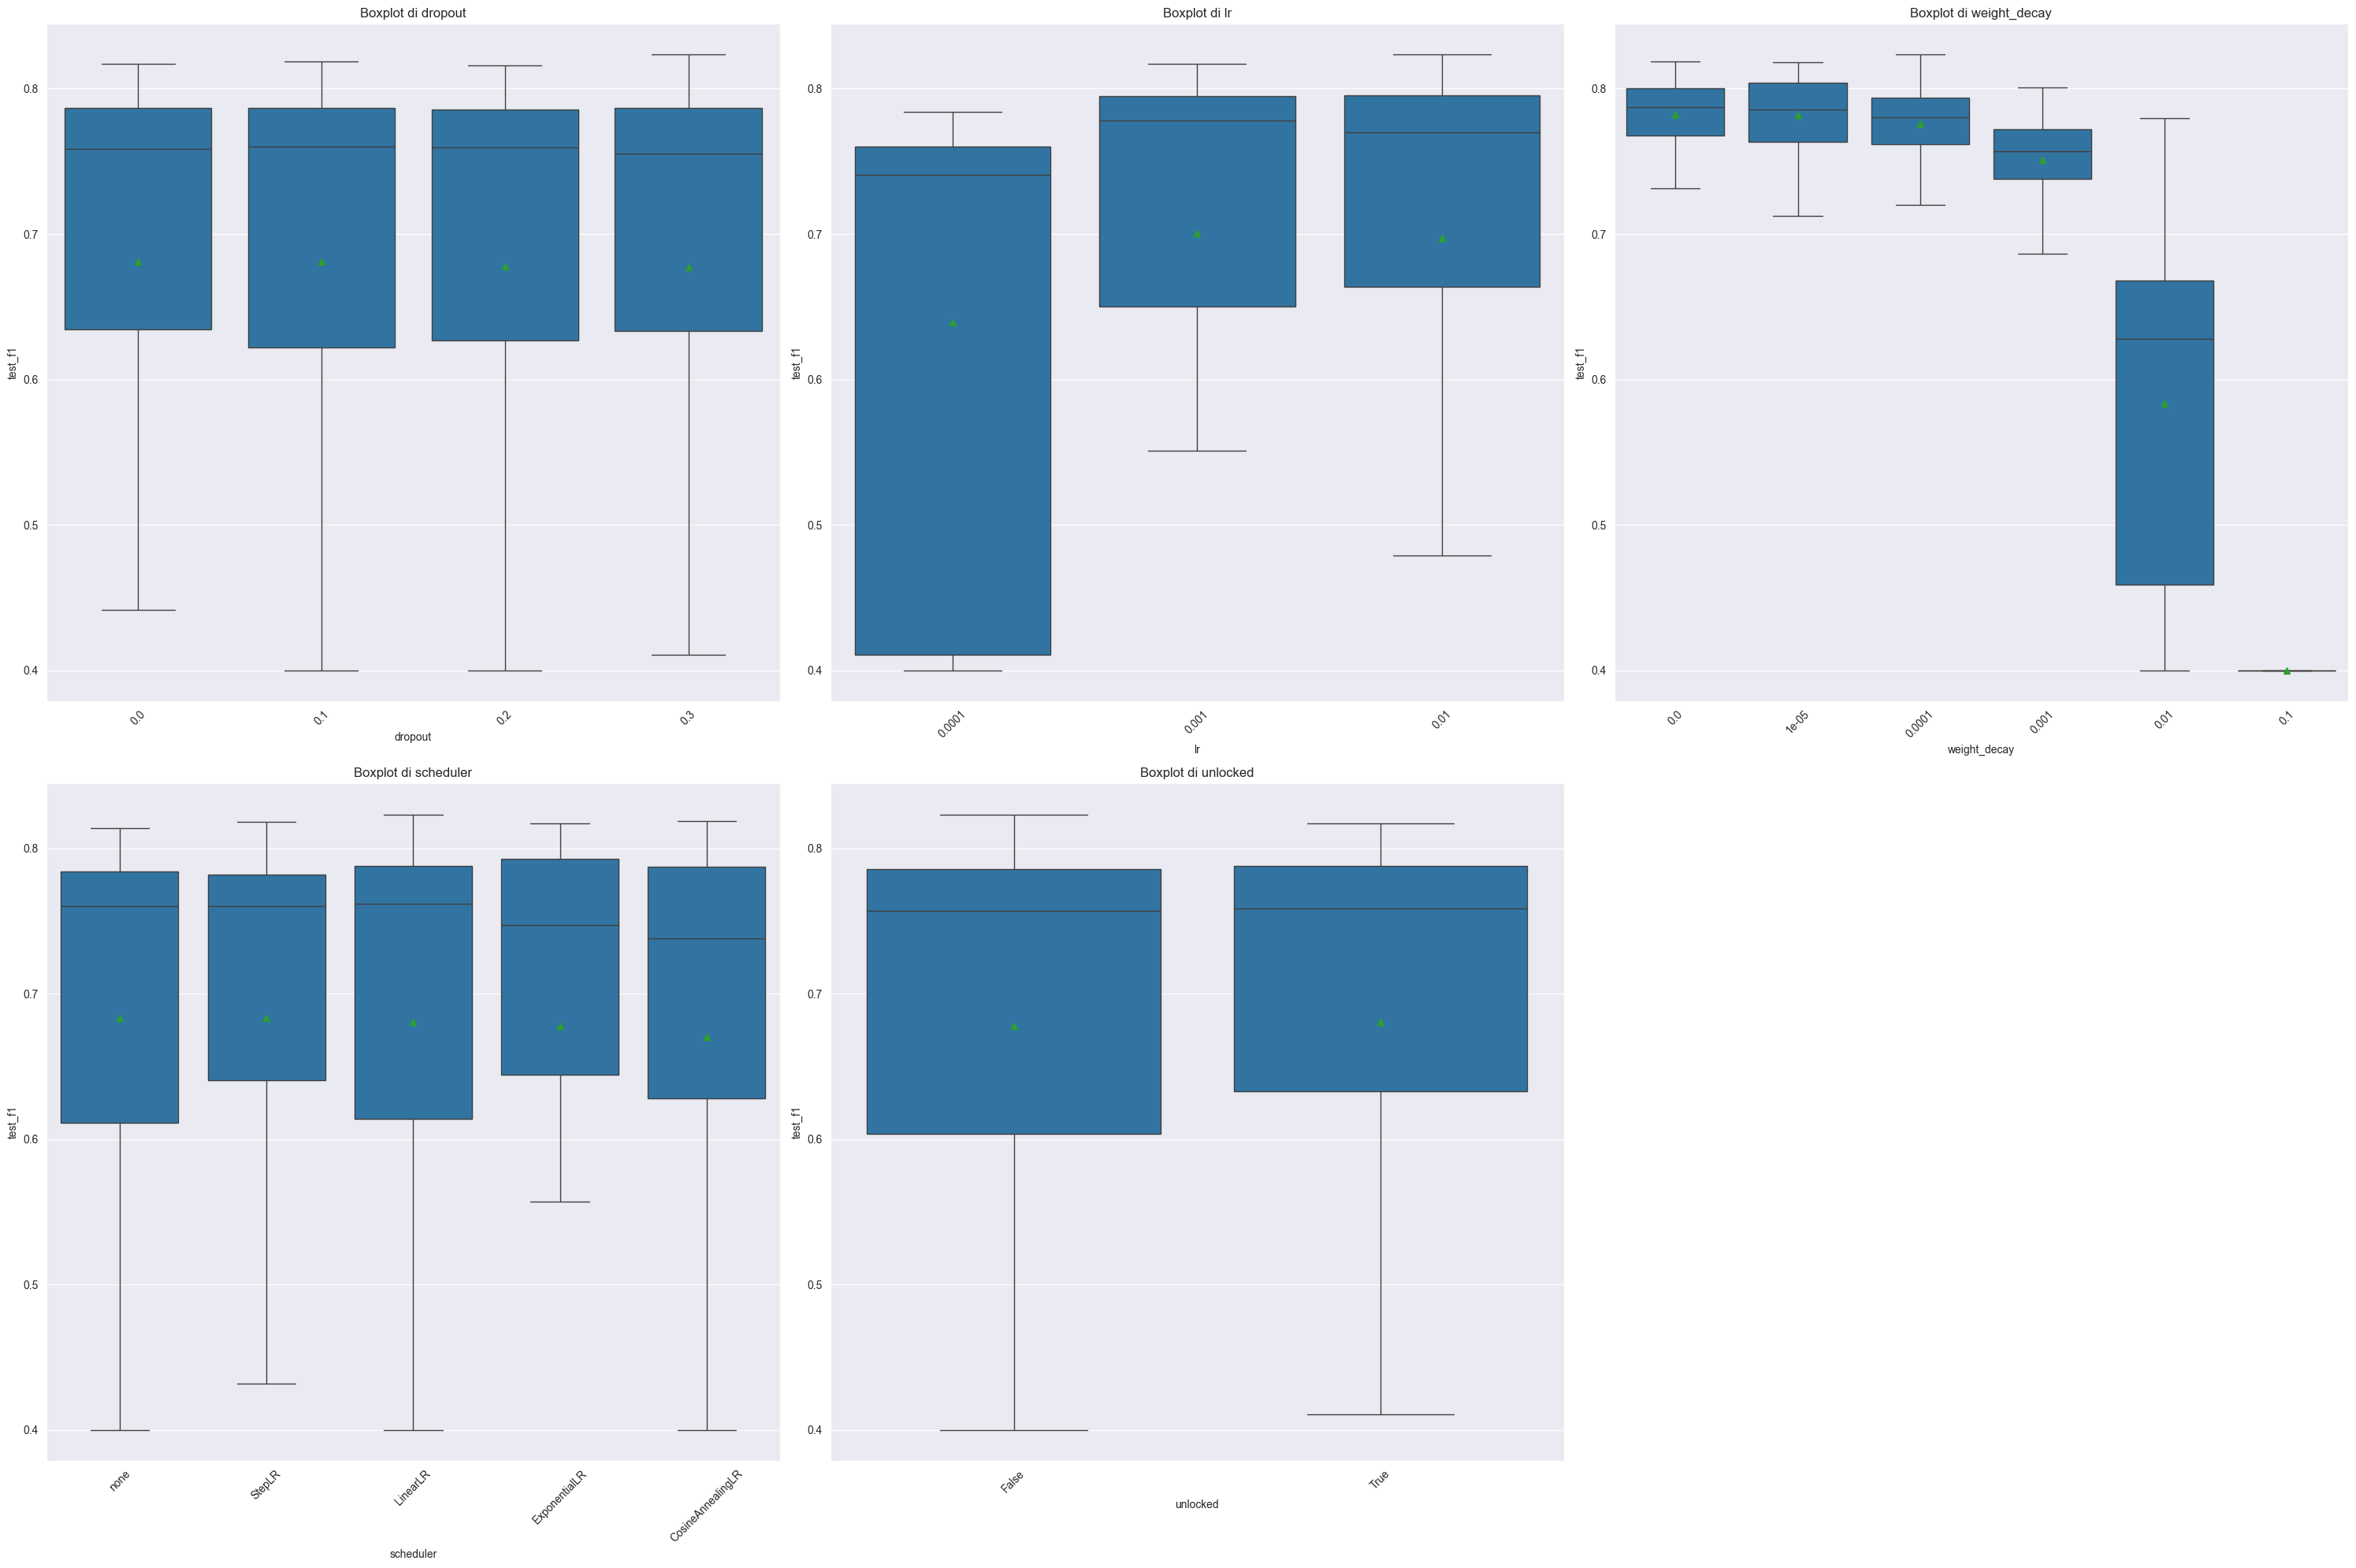

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il CSV
df = pd.read_csv('openclip-rn50quickgelu_GS.csv')  # Modifica il nome del file se necessario

# Liste delle colonne di interesse
columns_to_plot = ["dropout", "lr", "weight_decay", "scheduler", "unlocked"]

# Imposta il layout per i grafici
plt.figure(figsize=(30, 20))

# Per ogni colonna, filtra i valori unici e crea il boxplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 righe e 3 colonne per i grafici
    sns.boxplot(x=column, y="test_f1", data=df, showmeans=True, showfliers=False)
    plt.title(f"Boxplot di {column}")
    plt.xlabel(column)
    plt.ylabel('test_f1')
    
    # Inclinazione delle etichette dell'asse x
    plt.xticks(rotation=45)

# Mostra i grafici
plt.tight_layout()
plt.show()


In [3]:
# Confronto dei due modelli

import pandas as pd
from scipy.stats import wilcoxon

# Carica i due file CSV
file_model_a = 'clip-vit-large-patch14_GS.csv'  # Sostituisci con il percorso del primo file
file_model_b = "openclip-rn50quickgelu_GS.csv"  #'Salesforce_blip2_opt_2.7b_GS.csv'  # Sostituisci con il percorso del secondo file

# Carica i dati dei file CSV
df_model_a = pd.read_csv(file_model_a)
df_model_b = pd.read_csv(file_model_b)

# Assicurati che la colonna 'test_f1' esista in entrambi i DataFrame
if 'test_f1' not in df_model_a.columns or 'test_f1' not in df_model_b.columns:
    raise ValueError("La colonna 'test_f1' non è presente in uno dei file CSV.")

# Estrai i valori F1 dalla colonna 'test_f1'
f1_model_a = df_model_a['test_f1'].values
f1_model_b = df_model_b['test_f1'].values

# Assicurati che le dimensioni dei due array siano uguali
if len(f1_model_a) != len(f1_model_b):
    raise ValueError("I file CSV devono avere lo stesso numero di righe.")

# Esegui il test di Wilcoxon
statistic, p_value = wilcoxon(f1_model_a, f1_model_b)

# Stampare i risultati
print(f"Statistic value: {statistic}")
print(f"P-value: {p_value}")

# Interpretare i risultati
alpha = 0.05
if p_value < alpha:
    print("C'è una differenza significativa tra i due modelli.")
else:
    print("Non c'è una differenza significativa tra i due modelli.")


Statistic value: 15.0
P-value: 3.845181427226903e-97
C'è una differenza significativa tra i due modelli.


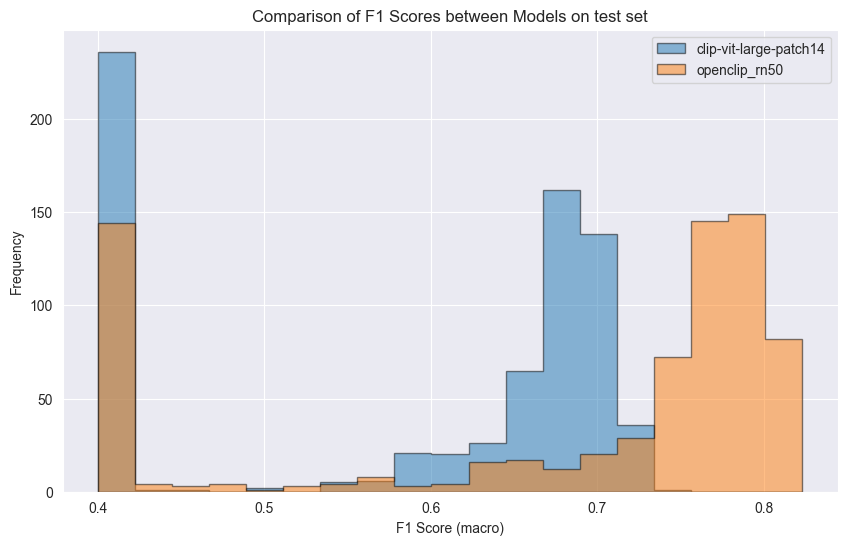

In [4]:
# Confronto dei due modelli
import pandas as pd
from scipy.stats import wilcoxon

# Carica i due file CSV
file_model_a = 'clip-vit-large-patch14_GS.csv'  # Sostituisci con il percorso del primo file
file_model_b = "openclip-rn50quickgelu_GS.csv"  # Sostituisci con il percorso del secondo file


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dei file CSV
df_model_a = pd.read_csv(file_model_a)
df_model_b = pd.read_csv(file_model_b)

# Estrai i valori F1 dalla colonna 'f1'
f1_model_a = df_model_a['test_f1']
f1_model_b = df_model_b['test_f1']

# Calcola i bin comuni per entrambi i modelli
bins = np.linspace(min(f1_model_a.min(), f1_model_b.min()), max(f1_model_a.max(), f1_model_b.max()), 20)

#bins = np.linspace(min(f1_model_a.min(), f1_model_b.min(), f1_model_c.min()), max(f1_model_a.max(), f1_model_b.max(), f1_model_c.max(), 20))



# Crea il grafico a istogramma
plt.figure(figsize=(10, 6))

# Istogramma per il modello A
plt.hist(f1_model_a, bins=bins, alpha=0.5, label='clip-vit-large-patch14', edgecolor='black', histtype='stepfilled', align='mid')

# Istogramma per il modello B, con un piccolo offset
plt.hist(f1_model_b, bins=bins, alpha=0.5, label='openclip_rn50', edgecolor='black', histtype='stepfilled', align='mid')

# Istogramma per il modello C, con un piccolo offset
#plt.hist(f1_model_c, bins=bins, alpha=0.5, label='Salesforce_blip2_opt_2.7b', edgecolor='red', histtype='stepfilled', align='mid')

# Aggiungi etichette e titolo
plt.xlabel('F1 Score (macro)')
plt.ylabel('Frequency')
plt.title('Comparison of F1 Scores between Models on test set')
plt.legend()

# Mostra il grafico
plt.show()


